In [43]:
using JLD
using PyPlot
using Statistics
using StatsBase 
using LinearAlgebra

using DSP
using ImageFiltering

In [44]:
using JLD2
using FileIO

In [45]:
SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 10

# plt.rc("font", family="serif",) #serif="Times"
# plt.rc("font", family= "Times New Roman")
plt.rc("font", family="serif", serif="Computer Modern")
plt.rc("font", size=SMALL_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)    # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc("text", usetex=true)

In [46]:
data = load("../data/experiment/images.jld")

Dict{String, Any} with 5 entries:
  "ImagesIS2"   => [0 0 … 0 0; 0 0 … 0 0; … ; 43 33 … 35 15; 23 140 … 44 28]…
  "ImagesBTV50" => [10 3 … 0 0; 3 0 … 0 0; … ; 6 0 … 0 0; 4 0 … 0 0]…
  "charge"      => [0.1298, 0.1712, 0.095, 0.0433, 0.097, 0.136, 0.1404, 0.1837…
  "ImagesBTV26" => [81 24 … 14 0; 70 49 … 37 0; … ; 38 54 … 23 3; 69 22 … 23 4]…
  "ImagesBTV53" => [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 21 0; 0 0 … 0 0]…

In [47]:
cam_1 = Float64.(data["ImagesBTV50"])
cam_2 = Float64.(data["ImagesBTV53"])
cam_3  = Float64.(data["ImagesBTV26"])
cam_4 = Float64.(data["ImagesIS2"])
charge  = Float64.(data["charge"])

enumerate_events = collect(1:length(charge));

In [48]:
function conv_data(data)
    kern = KernelFactors.gaussian((7))
    cv_matrix = imfilter(data, kern)
end

conv_data (generic function with 1 method)

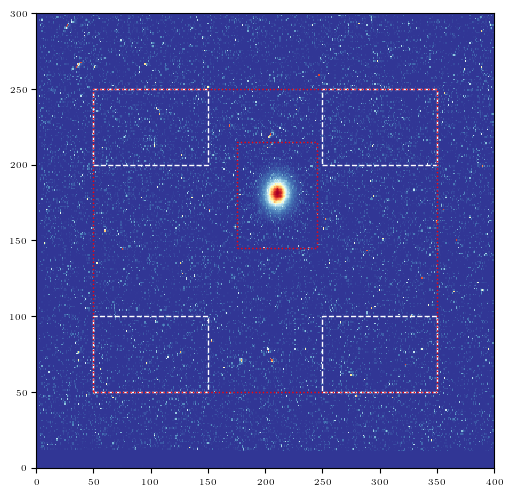

PyObject <matplotlib.patches.Rectangle object at 0x7f1cbc24c6d0>

In [131]:
fig, ax = plt.subplots(1,1, figsize=(5.905631659056317, 5.905631659056317))

fig.subplots_adjust(hspace=0.1, wspace=0.05)

ev_number = 200

ax.pcolormesh(collect(0:400), collect(0:300),  cam_1[ev_number,:,:], cmap="RdYlBu_r")

rect_1 = (x1=50, x2=150, y1 = 200, y2 = 250)
rect_2 = (x1=250, x2=350, y1 = 200, y2 = 250)
rect_3 = (x1=50, x2=150, y1 = 50, y2 = 100)
rect_4 = (x1=250, x2=350, y1 = 50, y2 = 100)

rect_5 = (x1=175, x2=175+70, y1 = 145, y2 = 145+70)

proxy = plt.Rectangle((rect_1.x1, rect_1.y1), rect_1.x2 - rect_1.x1, rect_1.y2 - rect_1.y1, fc = "None", ec=:white, ls=:dashed, lw=1)
ax.add_patch(proxy)

proxy = plt.Rectangle((rect_2.x1, rect_2.y1), rect_2.x2 - rect_2.x1, rect_2.y2 - rect_2.y1, fc = "None", ec=:white, ls=:dashed, lw=1)
ax.add_patch(proxy)

proxy = plt.Rectangle((rect_3.x1, rect_3.y1), rect_3.x2 - rect_3.x1, rect_3.y2 - rect_3.y1, fc = "None", ec=:white, ls=:dashed, lw=1)
ax.add_patch(proxy)

proxy = plt.Rectangle((rect_4.x1, rect_4.y1), rect_4.x2 - rect_4.x1, rect_4.y2 - rect_4.y1, fc = "None", ec=:white, ls=:dashed, lw=1)
ax.add_patch(proxy)

proxy = plt.Rectangle((rect_5.x1, rect_5.y1), rect_5.x2 - rect_5.x1, rect_5.y2 - rect_5.y1, fc = "None", ec=:red, ls=:dotted, lw=1)
ax.add_patch(proxy)

proxy = plt.Rectangle((50, 50), 300, 200, fc = "None", ec=:red, ls=:dotted, lw=1)
ax.add_patch(proxy)

In [50]:
event_mask = charge .> 15.;

In [51]:
data_temp = cam_1[event_mask,:,:]
pixel_mask = falses(size(data_temp))
pixel_mask[:,rect_1.y1:rect_1.y2,rect_1.x1:rect_1.x2] .= true;

bins = 0:1:4096
histogram_1 = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_1 = normalize(histogram_1, mode=:probability);

In [52]:
data_temp = cam_1[event_mask,:,:]
pixel_mask = falses(size(data_temp))
pixel_mask[:,rect_2.y1:rect_2.y2,rect_2.x1:rect_2.x2] .= true;

bins = 0:1:4096
histogram_2 = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_2 = normalize(histogram_2, mode=:probability);

In [53]:
data_temp = cam_1[event_mask,:,:]
pixel_mask = falses(size(data_temp))
pixel_mask[:,rect_3.y1:rect_3.y2,rect_3.x1:rect_3.x2] .= true;

bins = 0:1:4096
histogram_3 = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_3 = normalize(histogram_3, mode=:probability);

In [54]:
data_temp = cam_1[event_mask,:,:]
pixel_mask = falses(size(data_temp))
pixel_mask[:,rect_4.y1:rect_4.y2,rect_4.x1:rect_4.x2] .= true;

bins = 0:1:4096
histogram_4 = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_4 = normalize(histogram_4, mode=:probability);

In [55]:
data_temp = cam_1[event_mask,:,:]
pixel_mask = falses(size(data_temp))
pixel_mask[:,rect_5.y1:rect_5.y2,rect_5.x1:rect_5.x2] .= true;

bins = 0:1:4096
histogram_5 = fit(Histogram, data_temp[pixel_mask], bins, closed=:left)
histogram_5 = normalize(histogram_5, mode=:probability);

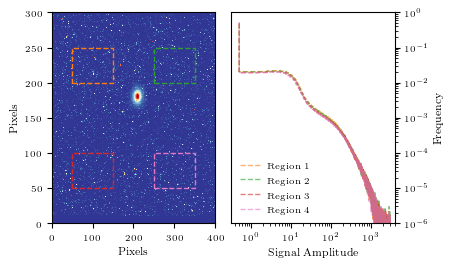

In [114]:

fig, ax = plt.subplots(1,2, figsize=(4.429223744292238, 2.737410817750676))

fig.subplots_adjust(hspace=0.1, wspace=0.1)

ev_number = 200

ax[1].pcolormesh(collect(0:400), collect(0:300),  cam_1[ev_number,:,:], cmap="RdYlBu_r", rasterized=true)

ax[2].step(midpoints(histogram_1.edges[1]), histogram_1.weights, lw=1.0, alpha=0.6, ls="dashed", color=:C1, label="Region 1")
ax[2].step(midpoints(histogram_2.edges[1]), histogram_2.weights, lw=1.0, alpha=0.6, ls="dashed", color=:C2, label="Region 2")
ax[2].step(midpoints(histogram_3.edges[1]), histogram_3.weights, lw=1.0, alpha=0.6, ls="dashed", color=:C3, label="Region 3")
ax[2].step(midpoints(histogram_4.edges[1]), histogram_4.weights, lw=1.0, alpha=0.6, ls="dashed", color=:C6, label="Region 4")

# ax[2].step(midpoints(histogram_1.edges[1]), conv_data(histogram_1.weights), lw=1.0, alpha=0.6, ls="dashed", color=:C1, label="Region 1")
# ax[2].step(midpoints(histogram_2.edges[1]), conv_data(histogram_2.weights), lw=1.0, alpha=0.6, ls="dashed", color=:C2, label="Region 2")
# ax[2].step(midpoints(histogram_3.edges[1]), conv_data(histogram_3.weights), lw=1.0, alpha=0.6, ls="dashed", color=:C3, label="Region 3")
# ax[2].step(midpoints(histogram_4.edges[1]), conv_data(histogram_4.weights), lw=1.0, alpha=0.6, ls="dashed", color=:C6, label="Region 4")


ax[2].set_xscale("log")
ax[2].set_yscale("log")

proxy = plt.Rectangle((rect_1.x1, rect_1.y1), rect_1.x2 - rect_1.x1, rect_1.y2 - rect_1.y1, fc = "None", ec=:C1, ls=:dashed, lw=1.0)
ax[1].add_patch(proxy)

proxy = plt.Rectangle((rect_2.x1, rect_2.y1), rect_2.x2 - rect_2.x1, rect_2.y2 - rect_2.y1, fc = "None", ec=:C2, ls=:dashed, lw=1.0)
ax[1].add_patch(proxy)

proxy = plt.Rectangle((rect_3.x1, rect_3.y1), rect_3.x2 - rect_3.x1, rect_3.y2 - rect_3.y1, fc = "None", ec=:C3, ls=:dashed, lw=1.0)
ax[1].add_patch(proxy)

proxy = plt.Rectangle((rect_4.x1, rect_4.y1), rect_4.x2 - rect_4.x1, rect_4.y2 - rect_4.y1, fc = "None", ec=:C6, ls=:dashed, lw=1.0)
ax[1].add_patch(proxy)

ax[2].yaxis.set_label_position("right")
ax[2].yaxis.tick_right()

ax[1].set_ylabel("Pixels")
ax[1].set_xlabel("Pixels")

ax[2].set_ylabel("Frequency")
ax[2].set_xlabel("Signal Amplitude")

ax[2].legend(loc="lower left", ncol=1, framealpha=0.9, edgecolor=:white)

ax[2].set_xlim(0, 2^12)
ax[2].set_ylim(10^-6, 1)

# fig.savefig("../plots/backg-uniformality.pdf", bbox_inches = "tight")

In [57]:
SMALL_SIZE = 7
MEDIUM_SIZE = 8
BIGGER_SIZE = 9

# plt.rc("font", family="serif",) #serif="Times"
# plt.rc("font", family= "Times New Roman")
plt.rc("font", family="serif", serif="Computer Modern")
plt.rc("font", size=SMALL_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)    # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc("text", usetex=true)

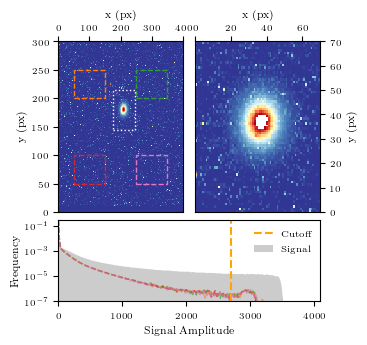

PyObject <matplotlib.legend.Legend object at 0x7f1cbe4cdee0>

In [115]:
fig = plt.figure(figsize=(3.375, 3.375),)

fig.subplots_adjust(hspace=0.1, wspace=0.1)

# ax1 = plt.subplot2grid((3, 2), (1, 0), rowspan=2, colspan=1,  )
# ax2 = plt.subplot2grid((3, 2), (0, 0), rowspan=1, colspan=2,  )
# # ax3 = plt.subplot2grid((3, 2), (1, 1), rowspan=3, colspan=1, xticklabels=[], yticklabels=[], xticks=[], yticks=[], fc="orange",)
# ax3 = plt.subplot2grid((3, 2), (1, 1), rowspan=3, colspan=1,  )

ax1 = plt.subplot2grid((3, 2), (0, 0), rowspan=2, colspan=1,  )
ax2 = plt.subplot2grid((3, 2), (2, 0), rowspan=1, colspan=2,  )
# ax3 = plt.subplot2grid((3, 2), (1, 1), rowspan=3, colspan=1, xticklabels=[], yticklabels=[], xticks=[], yticks=[], fc="orange",)
ax3 = plt.subplot2grid((3, 2), (0, 1), rowspan=2, colspan=1,  )

ax1.pcolormesh(collect(0:400), collect(0:300),  cam_1[ev_number,:,:], cmap="RdYlBu_r", rasterized=true)

# ax2.step(midpoints(histogram_1.edges[1]), histogram_1.weights, lw=0.5, alpha=0.6, ls="dashed", color=:C1,)
# ax2.step(midpoints(histogram_2.edges[1]), histogram_2.weights, lw=0.5, alpha=0.6, ls="dashed", color=:C2,)
# ax2.step(midpoints(histogram_3.edges[1]), histogram_3.weights, lw=0.5, alpha=0.6, ls="dashed", color=:C3, )
# ax2.step(midpoints(histogram_4.edges[1]), histogram_4.weights, lw=0.5, alpha=0.6, ls="dashed", color=:C6, )

ax2.step(midpoints(histogram_1.edges[1]), conv_data(histogram_1.weights), lw=1.0, alpha=0.6, ls="dashed", color=:C1, )
ax2.step(midpoints(histogram_2.edges[1]), conv_data(histogram_2.weights), lw=1.0, alpha=0.6, ls="dashed", color=:C2, )
ax2.step(midpoints(histogram_3.edges[1]), conv_data(histogram_3.weights), lw=1.0, alpha=0.6, ls="dashed", color=:C3, )
ax2.step(midpoints(histogram_4.edges[1]), conv_data(histogram_4.weights), lw=1.0, alpha=0.6, ls="dashed", color=:C6,)

ax2.set_ylim(bottom=10^-7)

# ax2.step(midpoints(histogram_5.edges[1]), histogram_5.weights, lw=1.0, alpha=0.6, ls="dotted", color=:gray, label="Signal")
ax2.fill_between(midpoints(histogram_5.edges[1]), conv_data(histogram_5.weights), color="gray", lw=0.0, step="pre", alpha=0.4, label="Signal")

ax2.set_xlim(xmin=0, xmax=2^12)

# ax2.set_xscale("log")
ax2.set_yscale("log")

proxy = plt.Rectangle((rect_1.x1, rect_1.y1), rect_1.x2 - rect_1.x1, rect_1.y2 - rect_1.y1, fc = "None", ec=:C1, ls=:dashed, lw=1.0)
ax1.add_patch(proxy)

proxy = plt.Rectangle((rect_2.x1, rect_2.y1), rect_2.x2 - rect_2.x1, rect_2.y2 - rect_2.y1, fc = "None", ec=:C2, ls=:dashed, lw=1.0)
ax1.add_patch(proxy)

proxy = plt.Rectangle((rect_3.x1, rect_3.y1), rect_3.x2 - rect_3.x1, rect_3.y2 - rect_3.y1, fc = "None", ec=:C3, ls=:dashed, lw=1.0)
ax1.add_patch(proxy)

proxy = plt.Rectangle((rect_4.x1, rect_4.y1), rect_4.x2 - rect_4.x1, rect_4.y2 - rect_4.y1, fc = "None", ec=:C6, ls=:dashed, lw=1.0)
ax1.add_patch(proxy)

proxy = plt.Rectangle((175, 145), 70, 70, fc = "None", ec=:white, ls=:dotted, lw=1, label="Rubidium Section")
ax1.add_patch(proxy)

ax2.axvline(2700, ls=:dashed, label="Cutoff", color="orange")

img_tmpp = cam_1[ev_number,145:145+70, 175:175+70]

img_tmpp = replace(x-> x > 3000 ? NaN : x, img_tmpp )
ax3.pcolormesh(collect(0:70), collect(0:70), img_tmpp, cmap="RdYlBu_r")
ax3.yaxis.set_label_position("right")
ax3.yaxis.tick_right()
ax1.xaxis.tick_top()
ax3.xaxis.tick_top()

ax3.set_ylabel("y (px)")
ax3.set_xlabel("x (px)")

ax1.set_ylabel("y (px)")
ax1.set_xlabel("x (px)")

ax3.xaxis.set_label_position("top")
ax1.xaxis.set_label_position("top")

ax2.set_xlabel("Signal Amplitude")
ax2.set_ylabel("Frequency")

ax2.legend(framealpha=0.0)

# fig.savefig("../plots-prl/background-data.png", bbox_inches = "tight", dpi=350)

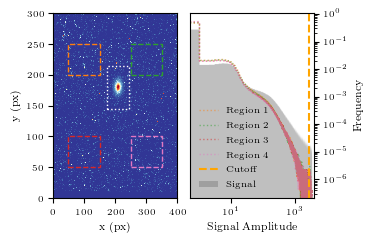

In [124]:
fig, ax = plt.subplots(1,2, figsize=(3.375, 2.4))

fig.subplots_adjust(hspace=0.1, wspace=0.1)

ax[1].pcolormesh(collect(0:400), collect(0:300),  cam_1[ev_number,:,:], cmap="RdYlBu_r", rasterized=true)

proxy = plt.Rectangle((rect_1.x1, rect_1.y1), rect_1.x2 - rect_1.x1, rect_1.y2 - rect_1.y1, fc = "None", ec=:C1, ls=:dashed, lw=1.0)
ax[1].add_patch(proxy)

proxy = plt.Rectangle((rect_2.x1, rect_2.y1), rect_2.x2 - rect_2.x1, rect_2.y2 - rect_2.y1, fc = "None", ec=:C2, ls=:dashed, lw=1.0)
ax[1].add_patch(proxy)

proxy = plt.Rectangle((rect_3.x1, rect_3.y1), rect_3.x2 - rect_3.x1, rect_3.y2 - rect_3.y1, fc = "None", ec=:C3, ls=:dashed, lw=1.0)
ax[1].add_patch(proxy)

proxy = plt.Rectangle((rect_4.x1, rect_4.y1), rect_4.x2 - rect_4.x1, rect_4.y2 - rect_4.y1, fc = "None", ec=:C6, ls=:dashed, lw=1.0)
ax[1].add_patch(proxy)

proxy = plt.Rectangle((175, 145), 70, 70, fc = "None", ec=:white, ls=:dotted, lw=1, label="Rubidium Section")
ax[1].add_patch(proxy)


ax[2].step(midpoints(histogram_1.edges[1]), histogram_1.weights, where = "mid", ls=:dotted, color=:C1, lw=1,  alpha=0.5, label="Region 1")
ax[2].step(midpoints(histogram_2.edges[1]), histogram_2.weights, where = "mid", ls=:dotted, color=:C2, lw=1,  alpha=0.5, label="Region 2")
ax[2].step(midpoints(histogram_3.edges[1]), histogram_3.weights, where = "mid", ls=:dotted, color=:C3, lw=1,  alpha=0.5, label="Region 3")
ax[2].step(midpoints(histogram_4.edges[1]), histogram_4.weights, where = "mid", ls=:dotted, color=:C6, lw=1,  alpha=0.5, label="Region 4")

ax[2].fill_between(midpoints(histogram_5.edges[1]), histogram_5.weights, step = "mid",color="gray", alpha=0.5,  lw=0.0, label="Signal")

ax[2].axvline(2700, ls=:dashed, label="Cutoff", color="orange")

ax[2].set_xlim(left=0.5, right=10+2^12)
# ax[2].set_ylim(top=1.2)

ax[2].yaxis.set_label_position("right")
ax[2].yaxis.tick_right()

# ax[2].set_ylim(10^-6, 1)

ax[2].set_ylabel("Frequency")
ax[2].set_xlabel("Signal Amplitude")

ax[2].legend(loc="lower left", ncol=1, framealpha=0.0)

ax[2].set_yscale("log")
ax[2].set_xscale("log")

ax[1].set_ylabel("y (px)")
ax[1].set_xlabel("x (px)")

# fig.savefig("../plots-prl/background-data.png", bbox_inches = "tight", dpi=350)

In [59]:
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using Distributions
using LinearAlgebra
using DSP
using ImageFiltering

In [60]:
function conv_data(data)
    kern = KernelFactors.gaussian((7))
    cv_matrix = imfilter(data, kern)
end

conv_data (generic function with 1 method)